In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import skill_metrics as sm
import torch
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader

from src.dataset import CERDataset
from src.mlp import MLPLucas

seaborn.set()

HORIZONS = 12
WINDOW = 3
DROPOUT = 0.0
DECOMP_METHOD = '2fft'
COMPLEXO_EOLICO='Amontada'
CENTRAL_EOLICA='IG'
TIME_STEP='30_min'
MES='Sep'
DECOMP=True
DEVICE = torch.device('cuda')


In [2]:
if not os.path.exists(f'data/components/{CENTRAL_EOLICA}_{MES}_{TIME_STEP}'):
    os.system(f'mkdir data/components/{CENTRAL_EOLICA}_{MES}_{TIME_STEP}')
if not os.path.exists(f'data/out/{CENTRAL_EOLICA}_{MES}_{TIME_STEP}'):
    os.system(f'mkdir data/out/{CENTRAL_EOLICA}_{MES}_{TIME_STEP}')

In [3]:
def plot_taylor(refs: dict, predictions_dict: dict):

    models = list(predictions_dict.keys())
    colors = ['c', 'm', 'y', 'k', 'r', 'b', 'g']
    colors = colors[:len(models)]
    models = {model: color for model, color in zip(models, colors)}
    for idx, (model, pred_dict) in enumerate(predictions_dict.items()):
        taylor_stats = []
        name = model[0]
        if model.endswith('ND'):
            name = name + 'ND'
        for horizon, pred in pred_dict.items():
            taylor_stats.append(sm.taylor_statistics(pred, refs[name][int(horizon)], 'data'))

        sdev = np.array([taylor_stats[0]['sdev'][0]]+[x['sdev'][1]
                                                    for x in taylor_stats])
        crmsd = np.array([taylor_stats[0]['crmsd'][0]]+[x['crmsd'][1]
                                                        for x in taylor_stats])
        ccoef = np.array([taylor_stats[0]['ccoef'][0]]+[x['ccoef'][1]
                                                        for x in taylor_stats])

        # To change other params in the plot, check SkillMetrics documentation in
        # https://github.com/PeterRochford/SkillMetrics/wiki/Target-Diagram-Options
        if len(list(predictions_dict.keys())) != 1:
            if idx != len(list(predictions_dict.keys()))-1 or len(list(predictions_dict.keys())) == 1:
                sm.taylor_diagram(sdev, crmsd, ccoef, styleOBS='-',
                                colOBS='g', markerobs='o',
                                titleOBS='Observation',
                                markercolor=models[model])
            else:
                sm.taylor_diagram(sdev, crmsd, ccoef, styleOBS='-',
                                titleOBS='Observation',
                                colOBS='g', markerobs='o', markercolor=models[model],
                                overlay = 'on', markerLabel=models)
        else:
            sm.taylor_diagram(sdev, crmsd, ccoef, styleOBS='-',
                      colOBS='g', markerobs='o',
                      titleOBS='Observation', markercolor='c',
                      markerLabel=['placeholder']+[
                          k+1 for k, v in pred_dict.items()])

In [4]:
dataset_lucas = CERDataset(window=WINDOW,
                           horizons=HORIZONS,
                           complexo_eolico=COMPLEXO_EOLICO,
                           central_eolica=CENTRAL_EOLICA,
                           time_step=TIME_STEP,
                           mes=MES,
                           decomp=DECOMP,
                           decomp_method=DECOMP_METHOD)

/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Decomp serie in 7 components
Decomp sub comp in 7 components
Decomp sub comp in 8 components
Decomp sub comp in 8 components
Decomp sub comp in 8 components
Decomp sub comp in 8 components
Decomp sub comp in 8 components
Decomp sub comp in 8 components
Getting test components


--------------------------------------------------------
Horizon: 1


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 41.10it/s, loss=0.000203, v_num=105, train_loss_step=0.000293, train_loss_epoch=0.00034]


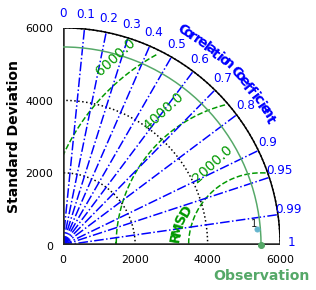

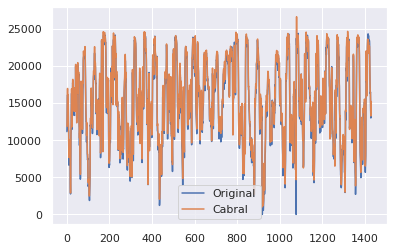

--------------------------------------------------------
--------------------------------------------------------
Horizon: 2


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 40.94it/s, loss=0.000672, v_num=106, train_loss_step=0.000776, train_loss_epoch=0.000701]


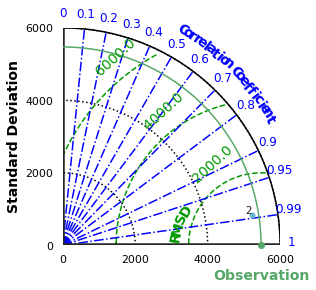

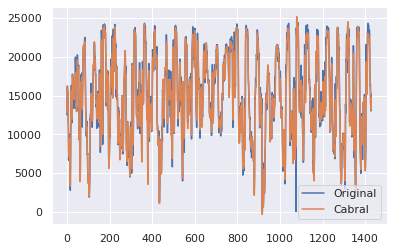

--------------------------------------------------------
--------------------------------------------------------
Horizon: 3


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 39.70it/s, loss=0.000125, v_num=107, train_loss_step=7.84e-5, train_loss_epoch=0.000193]


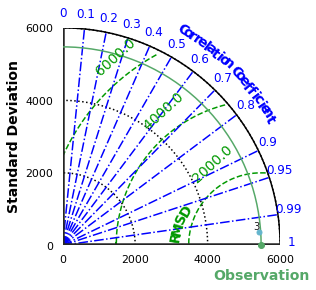

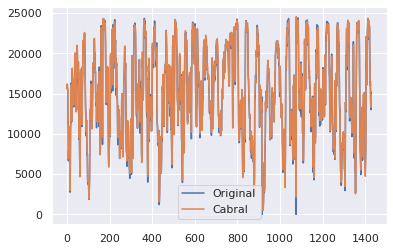

--------------------------------------------------------
--------------------------------------------------------
Horizon: 4


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 38.51it/s, loss=0.00137, v_num=108, train_loss_step=0.00107, train_loss_epoch=0.00155]


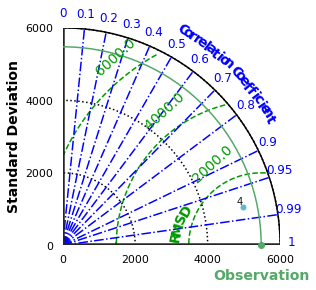

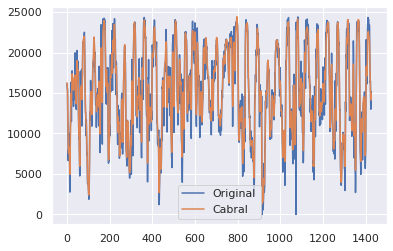

--------------------------------------------------------
--------------------------------------------------------
Horizon: 5


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 39.62it/s, loss=0.000946, v_num=109, train_loss_step=0.00102, train_loss_epoch=0.00108]


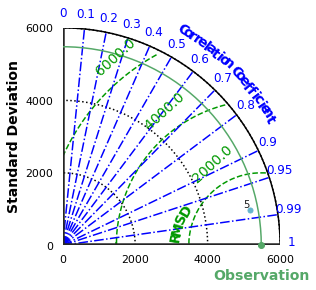

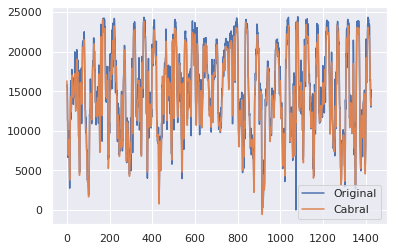

--------------------------------------------------------
--------------------------------------------------------
Horizon: 6


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 40.35it/s, loss=0.000136, v_num=110, train_loss_step=9.17e-5, train_loss_epoch=0.000299]


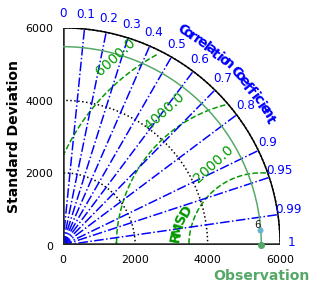

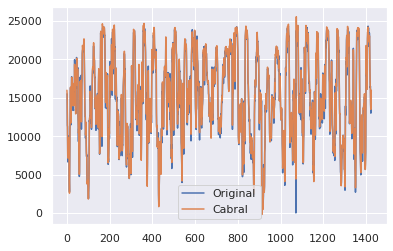

--------------------------------------------------------
--------------------------------------------------------
Horizon: 7


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 39.11it/s, loss=0.00163, v_num=111, train_loss_step=0.00119, train_loss_epoch=0.00199]


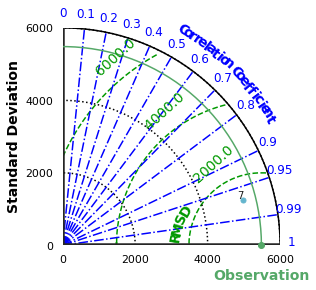

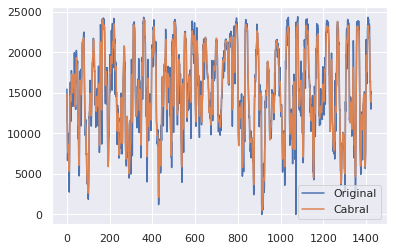

--------------------------------------------------------
--------------------------------------------------------
Horizon: 8


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 38.86it/s, loss=0.00187, v_num=112, train_loss_step=0.00174, train_loss_epoch=0.00244]


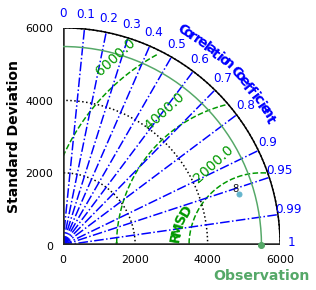

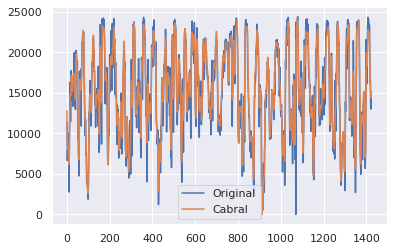

--------------------------------------------------------
--------------------------------------------------------
Horizon: 9


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 39.35it/s, loss=0.00213, v_num=113, train_loss_step=0.00127, train_loss_epoch=0.00265]


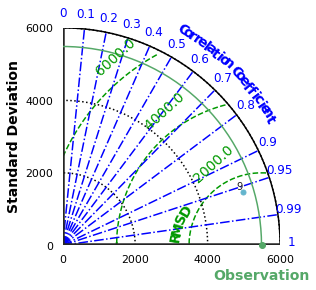

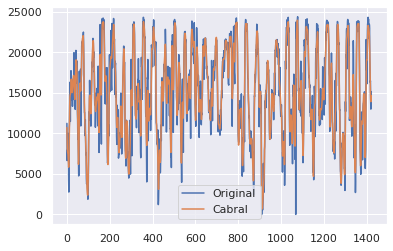

--------------------------------------------------------
--------------------------------------------------------
Horizon: 10


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 40.68it/s, loss=0.0011, v_num=114, train_loss_step=0.000864, train_loss_epoch=0.00122]


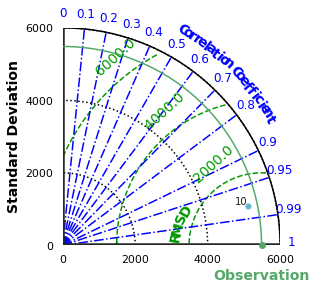

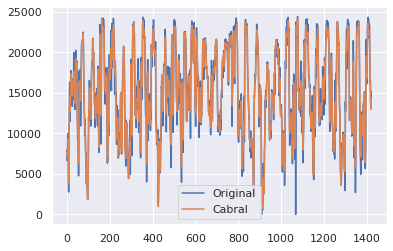

--------------------------------------------------------
--------------------------------------------------------
Horizon: 11


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 39.53it/s, loss=0.00461, v_num=115, train_loss_step=0.00369, train_loss_epoch=0.00598]


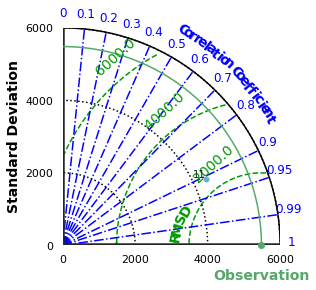

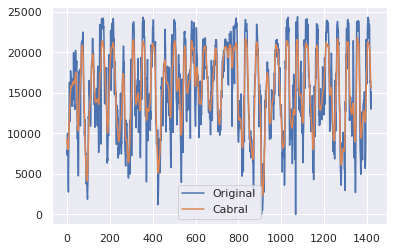

--------------------------------------------------------
--------------------------------------------------------
Horizon: 12


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/gonca/miniconda3/envs/ts/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | comp_layers | ModuleList | 28    
1 | fc_out      | Sequential | 80.4 K
-------------------------------------------
80.4 K    Trainable params
0         Non-trainable params
80.4 K    Total params
0.322     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 142/142 [00:03<00:00, 40.64it/s, loss=0.00228, v_num=116, train_loss_step=0.00159, train_loss_epoch=0.00295]


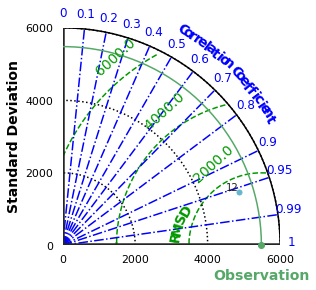

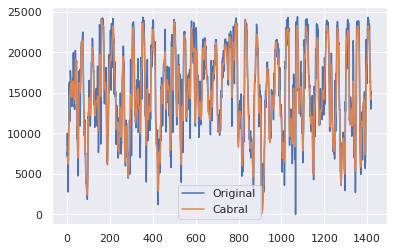

--------------------------------------------------------


In [5]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    print('--------------------------------------------------------')
    print(f'Horizon: {i+1}')
    dataset_lucas.set_type('train')
    dataset_lucas.set_horizon(i)
    train_loader_lucas = DataLoader(dataset_lucas, batch_size=128,
                                    shuffle=True, num_workers=8)
    input_example_lucas = next(iter(train_loader_lucas))[0]
    input_size_lucas = input_example_lucas.shape[1] * \
        input_example_lucas.shape[2]

    mlp = MLPLucas(window_size=input_example_lucas.shape[1],
                n_comps=input_example_lucas.shape[2],
                horizons=1)
    trainer = Trainer(gpus=1, max_epochs=10)
    trainer.fit(mlp, train_dataloaders=train_loader_lucas)
    dataset_lucas.set_type('test')
    mlp = mlp.cpu()
    X_test_lucas = dataset_lucas.samples
    y_mlp = mlp(X_test_lucas).detach()/dataset_lucas.test_scaler.scale_
    y = dataset_lucas.labels/dataset_lucas.test_scaler.scale_

    y_mlp = y_mlp.numpy()
    preds = {}
    preds['Cabral'] = {i: y_mlp}
    refs = {}
    refs['C'] = {i: y.numpy()}
    plot_taylor(refs, preds)
    plt.show()

    plt.plot(y)
    plt.plot(y_mlp)
    plt.legend(['Original', 'Cabral'])
    plt.show()
    print('--------------------------------------------------------')
